In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

import glob
import cv2
import random

import tensorflow as tf

#print versions
print('tensorflow version',tf.__version__)

path=os.getcwd()
print(path)

tensorflow version 2.3.1
/home/wcislab/NTHU_Medical


In [2]:
#Load Data
train_path = path+'/chest_xray/train'
val_path = path+'/chest_xray/val'
test_path = path+'/chest_xray/test2'
test_path2 = path+'/chest_xray/test'

In [3]:
train_files_original = glob.glob(train_path+'/*/*')
val_files_original = glob.glob(val_path+'/*/*')
test_files = glob.glob(test_path+'/*')




print('number of train samples across classes:', len(train_files_original))
print('number of val samples across classes:', len(val_files_original))
print('number of test samples across classes:', len(test_files))

number of train samples across classes: 5216
number of val samples across classes: 16
number of test samples across classes: 624


In [37]:
#輸出第一張原圖的size/max/min/mean
originalimage=cv2.imread(train_files[1])
print("------------------------------size-----------------------------")
print("Original Image shape: ", originalimage.shape)
print("\n\n")
print("------------------------------max value-----------------------------")
print("Original Image max-axis=0: ", originalimage.max(axis=(0)))
print("Original Image max-axis=1: ", originalimage.max(axis=(1)))
print("Original Image max-axis=2: ", originalimage.max(axis=(2)))
print("\n\n")
print("------------------------------min value-----------------------------")
print("Original Image min-axis=0: ", originalimage.min(axis=(0)))
print("Original Image min-axis=1: ", originalimage.min(axis=(1)))
print("Original Image min-axis=2: ", originalimage.min(axis=(2)))
print("\n\n")
print("------------------------------mean value-----------------------------")
print("Original Image mean-axis=0: ", originalimage.mean(axis=(0)))
print("Original Image mean-axis=1: ", originalimage.mean(axis=(1)))
print("Original Image mean-axis=2: ", originalimage.mean(axis=(2)))

------------------------------size-----------------------------
Original Image shape:  (800, 1184, 3)



------------------------------max value-----------------------------
Original Image max-axis=0:  [[255 255 255]
 [250 250 250]
 [255 255 255]
 ...
 [255 255 255]
 [250 250 250]
 [255 255 255]]
Original Image max-axis=1:  [[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [206 206 206]
 [206 206 206]
 [207 207 207]]
Original Image max-axis=2:  [[17 17 16 ...  8  0  7]
 [17 17 16 ... 18  0  0]
 [17 17 17 ...  3  0 12]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]



------------------------------min value-----------------------------
Original Image min-axis=0:  [[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Original Image min-axis=1:  [[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Original Image min-axis=2:  [[17 17 16 ...  8  0  7]
 [17 17 16 ... 18  0  0]
 [17 17 17 ...  3  0 12]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ..

In [4]:
files = np.unique(train_files_original + val_files_original)
train_files, val_files = train_test_split(files, test_size=0.3, shuffle=True)

print('number of train samples:', len(train_files))
print('number of val samples:', len(val_files))

number of train samples: 3662
number of val samples: 1570


In [5]:
count_normal = len([x for x in train_files if 'NORMAL' in x])
count_pneumonia = len([x for x in train_files if 'PNEUMONIA' in x])

print('Count of NORMAL images in train:', count_normal)
print('Count of PNEUMONIA images in train:', count_pneumonia)


Count of NORMAL images in train: 936
Count of PNEUMONIA images in train: 2726


In [6]:
IMG_SIZE = 180
def process_inputs(files_list):
    data = []
    for file in files_list:
        try:
      # figure out label
          parts = file.split('/')
          assert parts[-2] in ['NORMAL', 'PNEUMONIA']
          label = 1 if parts[-2] == "PNEUMONIA" else 0

      # figure out image pixel array
          img_arr = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
          resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        except Exception as e:
            raise Exception(e)
        data.append([resized_arr, label])
    return np.array(data)

In [7]:
train = process_inputs(train_files)
val = process_inputs(val_files)
# test2 = process_inputs(test_files)

In [9]:
test_data = []
img_handle=[]
IMG_SIZE = 180



for line in test_files:
    Type=line.split("/")[-1]
    img_handle.append(Type)
print(img_handle)


for img in test_files:
    img_arr = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (IMG_SIZE ,IMG_SIZE))
    test_data.append(resized_arr)
    
test = np.array(test_data)
print(test.shape)

['482.jpeg', '457.jpeg', '146.jpeg', '315.jpeg', '49.jpeg', '172.jpeg', '422.jpeg', '498.jpeg', '304.jpeg', '490.jpeg', '542.jpeg', '211.jpeg', '321.jpeg', '493.jpeg', '111.jpeg', '444.jpeg', '364.jpeg', '609.jpeg', '165.jpeg', '583.jpeg', '567.jpeg', '192.jpeg', '224.jpeg', '60.jpeg', '593.jpeg', '1.jpeg', '513.jpeg', '606.jpeg', '64.jpeg', '201.jpeg', '506.jpeg', '206.jpeg', '451.jpeg', '559.jpeg', '163.jpeg', '445.jpeg', '528.jpeg', '190.jpeg', '39.jpeg', '297.jpeg', '546.jpeg', '219.jpeg', '475.jpeg', '305.jpeg', '7.jpeg', '92.jpeg', '471.jpeg', '151.jpeg', '246.jpeg', '45.jpeg', '368.jpeg', '334.jpeg', '180.jpeg', '616.jpeg', '436.jpeg', '85.jpeg', '446.jpeg', '299.jpeg', '376.jpeg', '561.jpeg', '181.jpeg', '42.jpeg', '328.jpeg', '137.jpeg', '447.jpeg', '395.jpeg', '595.jpeg', '202.jpeg', '314.jpeg', '14.jpeg', '388.jpeg', '429.jpeg', '70.jpeg', '578.jpeg', '226.jpeg', '115.jpeg', '326.jpeg', '177.jpeg', '267.jpeg', '99.jpeg', '6.jpeg', '602.jpeg', '622.jpeg', '21.jpeg', '11.jpeg'

In [10]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature in test:
  x_test.append(feature)
#   y_test.append(label)

In [11]:
x_train[0]

array([[ 26,  17,  17, ..., 202, 205, 209],
       [ 28,  16,  16, ..., 200, 208, 208],
       [ 26,  16,  15, ..., 202, 203, 208],
       ...,
       [ 29,  28,  28, ...,  23,  24,  23],
       [ 29,  28,  28, ...,  23,  24,  23],
       [ 29,  28,  28, ...,  23,  24,  23]], dtype=uint8)

In [12]:
x_train = np.array(x_train) / 255.
x_val = np.array(x_val) / 255.
x_test = np.array(x_test) / 255.

In [13]:
x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# y_test = np.array(y_test)

In [38]:
#輸出修改後第一張原圖的size/max/min/mean
    print("------------------------------size-----------------------------")
    print("Process Image shape: ", x_train[0].shape)
    print("\n\n")
    print("------------------------------max value-----------------------------")
    print("Image max-axis=0: ",x_train[0].max(axis=(0)))
    print("Image max-axis=1: ",x_train[0].max(axis=(1)))
    print("Image max-axis=2: ",x_train[0].max(axis=(2)))
    print("\n\n")
    print("------------------------------min value-----------------------------")
    print("Image min-axis=0: ", x_train[0].min(axis=(0)))
    print("Image min-axis=1: ", x_train[1].min(axis=(1)))
    print("Image min-axis=2: ", x_train[2].min(axis=(2)))

    print("\n\n")
    print("------------------------------mean value-----------------------------")
    print("Image mean-axis=0: ", x_train[0].mean(axis=(0)))
    print("Image mean-axis=1: ", x_train[1].mean(axis=(1)))
    print("Image mean-axis=2: ", x_train[2].mean(axis=(2)))


------------------------------size-----------------------------
Process Image shape:  (180, 180, 1)



------------------------------max value-----------------------------
Image max-axis=0:  [[0.65490196]
 [0.4627451 ]
 [0.51764706]
 [0.5254902 ]
 [0.52156863]
 [0.5254902 ]
 [0.53333333]
 [0.5372549 ]
 [0.5372549 ]
 [0.5372549 ]
 [0.51764706]
 [0.50588235]
 [0.47843137]
 [1.        ]
 [0.99607843]
 [0.99215686]
 [0.98039216]
 [0.41568627]
 [0.41568627]
 [0.43921569]
 [0.45882353]
 [0.45490196]
 [0.49803922]
 [0.55686275]
 [0.58431373]
 [0.61960784]
 [0.65098039]
 [0.65098039]
 [0.67058824]
 [0.69411765]
 [0.70588235]
 [0.75686275]
 [0.76078431]
 [0.78431373]
 [0.78431373]
 [0.78039216]
 [0.77254902]
 [0.76078431]
 [0.74117647]
 [0.7372549 ]
 [0.74901961]
 [0.78039216]
 [0.76470588]
 [0.7372549 ]
 [0.72156863]
 [0.70980392]
 [0.69411765]
 [0.67058824]
 [0.6745098 ]
 [0.6745098 ]
 [0.6745098 ]
 [0.68627451]
 [0.68235294]
 [0.70980392]
 [0.71764706]
 [0.73333333]
 [0.72156863]
 [0.7215686

label =  1


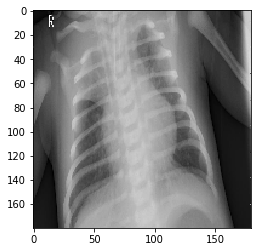

In [15]:
plt.imshow(x_train[0].reshape(180,180), cmap='gray')
print('label = ', y_train[0])

In [16]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

3662
1570
624


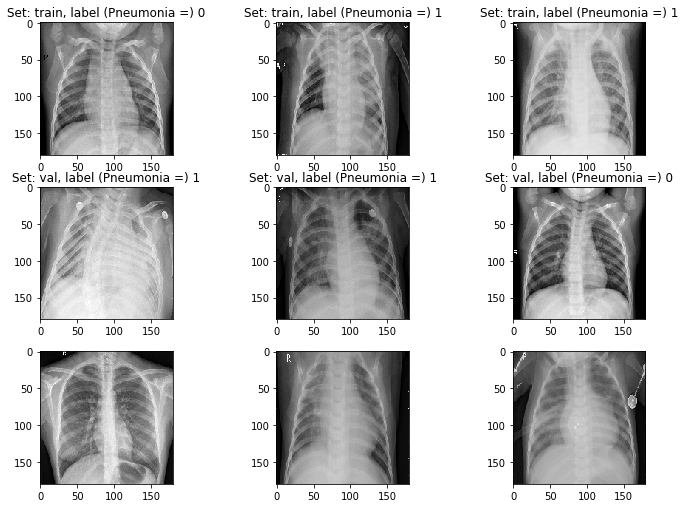

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(10, 7))
ax = ax.ravel()
plt.tight_layout()

for i in range(3):
  random_index = random.randint(0, min(len(x_train), len(x_val), len(x_test)))
  ax[i].imshow(x_train[random_index].reshape(180,180), cmap='gray')
  ax[i].set_title('Set: train, label (Pneumonia =) {}'.format(y_train[random_index]))

  ax[i+3].imshow(x_val[random_index].reshape(180,180), cmap='gray')
  ax[i+3].set_title('Set: val, label (Pneumonia =) {}'.format(y_val[random_index]))
  
  ax[i+6].imshow(x_test[random_index].reshape(180,180), cmap='gray')
#   ax[i+6].set_title('Set: test, label (Pneumonia =) {}'.format(y_test[random_index]))


  

In [18]:
def conv_block(filters):
  block = tf.keras.Sequential([
    tf.keras.layers.SeparableConv2D(filters, (3,3), activation='relu', padding='same'),
    tf.keras.layers.SeparableConv2D(filters, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),    
  ])
  return block

In [19]:
def dense_block(units, dropout_rate):
  block = tf.keras.Sequential([
    tf.keras.layers.Dense(units, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
  ])
  return block

In [20]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),

    conv_block(32),
    conv_block(64),
    
    conv_block(128),
    tf.keras.layers.Dropout(0.2),

    conv_block(256),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    dense_block(256, 0.7),
    dense_block(128, 0.5),
    dense_block(64, 0.3),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model

In [21]:
weight_for_normal = len(x_train) / (2 * count_normal)
weight_for_pneumonia = len(x_train) / (2 * count_pneumonia)

class_weight = {0:weight_for_normal, 1:weight_for_pneumonia}

print('weight for class 0 (normal): {:.3f}'.format(weight_for_normal))
print('weight for class 1 (pneumonia): {:.3f}'.format(weight_for_pneumonia))

weight for class 0 (normal): 1.956
weight for class 1 (pneumonia): 0.672


In [22]:
# compile a vanilla model

model_vanilla = build_model()

metrics = [
  'accuracy', 
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
]

model_vanilla.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [23]:
epochs = 100
batch_size = 64

In [24]:
history_vanilla = model_vanilla.fit(
    x=x_train, 
    y=y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(x_val,y_val), 
    class_weight=class_weight
)

Epoch 1/100
58/58 [==============================] - 54s 923ms/step - loss: 0.5850 - accuracy: 0.6813 - precision: 0.8951 - recall: 0.6478 - val_loss: 0.6113 - val_accuracy: 0.7369 - val_precision: 0.7369 - val_recall: 1.0000
Epoch 2/100
58/58 [==============================] - 53s 908ms/step - loss: 0.2830 - accuracy: 0.8869 - precision: 0.9761 - recall: 0.8694 - val_loss: 0.6276 - val_accuracy: 0.7369 - val_precision: 0.7369 - val_recall: 1.0000
Epoch 3/100
58/58 [==============================] - 53s 905ms/step - loss: 0.2035 - accuracy: 0.9263 - precision: 0.9789 - recall: 0.9208 - val_loss: 0.7872 - val_accuracy: 0.7369 - val_precision: 0.7369 - val_recall: 1.0000
Epoch 4/100
58/58 [==============================] - 52s 903ms/step - loss: 0.1618 - accuracy: 0.9407 - precision: 0.9831 - recall: 0.9365 - val_loss: 0.9213 - val_accuracy: 0.7369 - val_precision: 0.7369 - val_recall: 1.0000
Epoch 5/100
58/58 [==============================] - 53s 905ms/step - loss: 0.1465 - accuracy: 0

58/58 [==============================] - 49s 843ms/step - loss: 0.0316 - accuracy: 0.9888 - precision: 0.9963 - recall: 0.9886 - val_loss: 0.0850 - val_accuracy: 0.9752 - val_precision: 0.9982 - val_recall: 0.9680
Epoch 38/100
58/58 [==============================] - 49s 842ms/step - loss: 0.0425 - accuracy: 0.9855 - precision: 0.9948 - recall: 0.9857 - val_loss: 0.1343 - val_accuracy: 0.9548 - val_precision: 0.9936 - val_recall: 0.9447
Epoch 39/100
58/58 [==============================] - 49s 845ms/step - loss: 0.0734 - accuracy: 0.9686 - precision: 0.9928 - recall: 0.9648 - val_loss: 0.0676 - val_accuracy: 0.9758 - val_precision: 0.9746 - val_recall: 0.9931
Epoch 40/100
58/58 [==============================] - 49s 845ms/step - loss: 0.0408 - accuracy: 0.9869 - precision: 0.9959 - recall: 0.9864 - val_loss: 0.0818 - val_accuracy: 0.9777 - val_precision: 0.9938 - val_recall: 0.9758
Epoch 41/100
58/58 [==============================] - 49s 847ms/step - loss: 0.0386 - accuracy: 0.9858 - 

58/58 [==============================] - 49s 843ms/step - loss: 0.0180 - accuracy: 0.9934 - precision: 0.9974 - recall: 0.9938 - val_loss: 0.0747 - val_accuracy: 0.9752 - val_precision: 0.9938 - val_recall: 0.9723
Epoch 74/100
58/58 [==============================] - 49s 844ms/step - loss: 0.0076 - accuracy: 0.9978 - precision: 0.9993 - recall: 0.9978 - val_loss: 0.0596 - val_accuracy: 0.9841 - val_precision: 0.9813 - val_recall: 0.9974
Epoch 75/100
58/58 [==============================] - 49s 841ms/step - loss: 0.0100 - accuracy: 0.9959 - precision: 0.9982 - recall: 0.9963 - val_loss: 0.1256 - val_accuracy: 0.9669 - val_precision: 0.9585 - val_recall: 0.9983
Epoch 76/100
58/58 [==============================] - 49s 842ms/step - loss: 0.0120 - accuracy: 0.9967 - precision: 0.9993 - recall: 0.9963 - val_loss: 0.0747 - val_accuracy: 0.9783 - val_precision: 0.9779 - val_recall: 0.9931
Epoch 77/100
58/58 [==============================] - 49s 843ms/step - loss: 0.0109 - accuracy: 0.9973 - 

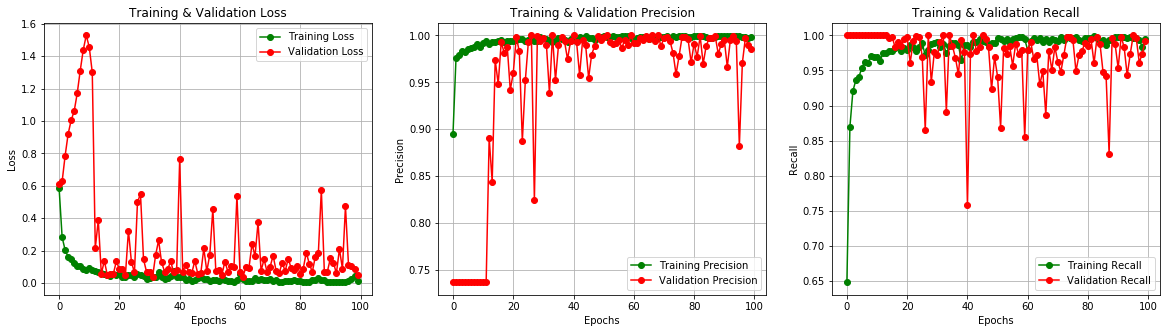

In [25]:
epochs_array = [i for i in range(epochs)]
fig, ax = plt.subplots(1,3)
train_precision = history_vanilla.history['precision']
train_recall = history_vanilla.history['recall']
train_loss = history_vanilla.history['loss']

val_precision = history_vanilla.history['val_precision']
val_recall = history_vanilla.history['val_recall']
val_loss = history_vanilla.history['val_loss']
fig.set_size_inches(20,5)

ax[0].plot(epochs_array, train_loss, 'g-o', label='Training Loss')
ax[0].plot(epochs_array, val_loss, 'r-o', label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].grid(True)

ax[1].plot(epochs_array, train_precision, 'go-', label='Training Precision')
ax[1].plot(epochs_array, val_precision, 'ro-', label='Validation Precision')
ax[1].set_title('Training & Validation Precision')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Precision')
ax[1].grid(True)

ax[2].plot(epochs_array, train_recall, 'go-', label='Training Recall')
ax[2].plot(epochs_array, val_recall, 'ro-', label='Validation Recall')
ax[2].set_title('Training & Validation Recall')
ax[2].legend()
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Recall')
ax[2].grid(True)

plt.show()

In [26]:
def print_results(y_test, y_pred):
    print('Accuracy   : {:.5f}'.format(accuracy_score(y_pred , y_test))) 
    print('AUC        : {:.5f}'.format(roc_auc_score(y_test , y_pred)))
    print('Precision  : {:.5f}'.format(precision_score(y_test , y_pred)))
    print('Recall     : {:.5f}'.format(recall_score(y_test , y_pred)))
    print('F1         : {:.5f}'.format(f1_score(y_test , y_pred)))
    print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))

In [27]:

predictions = model_vanilla.predict(x=x_test)
y_pred = np.round(predictions).reshape(1,-1)[0]
# print_results(y_test, y_pred)

In [28]:
# compile fine tuned model

model_ft = build_model()

metrics = [
  'accuracy', 
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
]

model_ft.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [29]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('xray_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1, restore_best_weights=True)

In [30]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [31]:
epochs = 100
batch_size = 32

In [32]:
history_ft = model_ft.fit(
    x=x_train, 
    y=y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(x_val,y_val), 
    class_weight=class_weight,
    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/100
115/115 [==============================] - 48s 420ms/step - loss: 0.4673 - accuracy: 0.7725 - precision: 0.9239 - recall: 0.7568 - val_loss: 0.5085 - val_accuracy: 0.7548 - val_precision: 0.7506 - val_recall: 0.9991
Epoch 2/100
115/115 [==============================] - 48s 415ms/step - loss: 0.2443 - accuracy: 0.9020 - precision: 0.9654 - recall: 0.9006 - val_loss: 2.0763 - val_accuracy: 0.3656 - val_precision: 1.0000 - val_recall: 0.1392
Epoch 3/100
115/115 [==============================] - 48s 417ms/step - loss: 0.1947 - accuracy: 0.9274 - precision: 0.9745 - recall: 0.9266 - val_loss: 0.1729 - val_accuracy: 0.9357 - val_precision: 0.9862 - val_recall: 0.9257
Epoch 4/100
115/115 [==============================] - 48s 415ms/step - loss: 0.1734 - accuracy: 0.9317 - precision: 0.9787 - recall: 0.9285 - val_loss: 8.8983 - val_accuracy: 0.3025 - val_precision: 1.0000 - val_recall: 0.0536
Epoch 5/100
115/115 [==============================] - 48s 416ms/step - loss: 0.2166 - a

Epoch 00036: early stopping


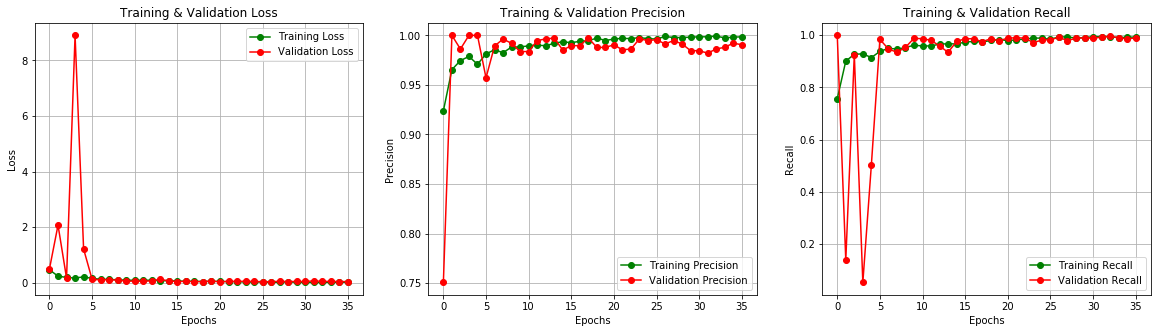

In [33]:
epochs_array = [i for i in range(len(history_ft.history['accuracy']))]
fig, ax = plt.subplots(1,3)
train_precision = history_ft.history['precision']
train_recall = history_ft.history['recall']
train_loss = history_ft.history['loss']

val_precision = history_ft.history['val_precision']
val_recall = history_ft.history['val_recall']
val_loss = history_ft.history['val_loss']
fig.set_size_inches(20,5)

ax[0].plot(epochs_array, train_loss, 'g-o', label='Training Loss')
ax[0].plot(epochs_array, val_loss, 'r-o', label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].grid(True)

ax[1].plot(epochs_array, train_precision, 'go-', label='Training Precision')
ax[1].plot(epochs_array, val_precision, 'ro-', label='Validation Precision')
ax[1].set_title('Training & Validation Precision')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Precision')
ax[1].grid(True)

ax[2].plot(epochs_array, train_recall, 'go-', label='Training Recall')
ax[2].plot(epochs_array, val_recall, 'ro-', label='Validation Recall')
ax[2].set_title('Training & Validation Recall')
ax[2].legend()
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Recall')
ax[2].grid(True)
plt.show()

/home/wcislab/NTHU_Medical/chest_xray/test2/482.jpeg


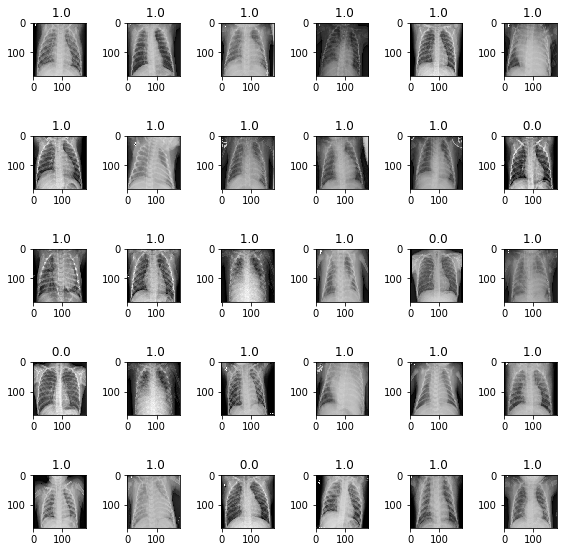

In [34]:
predictions = model_ft.predict(x=x_test)
y_pred = np.round(predictions).reshape(1,-1)[0]
print(test_files[0])
fig, ax = plt.subplots(5,6, figsize=(8, 8))
ax = ax.ravel()
plt.tight_layout()

for i in range(30):#簡單print 出30個預測圖,0為Normal, 1為Pneumonia
    ax[i].imshow(x_test[i].reshape(180,180), cmap='gray')
    ax[i].set_title(' {}'.format(y_pred[i]))
    i=i+1
#     print('label = ', y_pred[i])
    

In [35]:
# print_results(y_test, y_pred)

In [36]:
#將jpeg以及predict結果輸入成dataframe再轉出csv檔
from pandas.core.frame import DataFrame
a=img_handle
b=y_pred
c={"case":a,"predict":b}
data=DataFrame(c)
print(data)
data.to_csv(path+'/109064518_高聖哲2.csv',index=False)


         case  predict
0    482.jpeg      1.0
1    457.jpeg      1.0
2    146.jpeg      1.0
3    315.jpeg      1.0
4     49.jpeg      1.0
..        ...      ...
619  601.jpeg      1.0
620   35.jpeg      1.0
621  347.jpeg      1.0
622  403.jpeg      1.0
623  155.jpeg      0.0

[624 rows x 2 columns]
